In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

labels = np.unique(y_train)

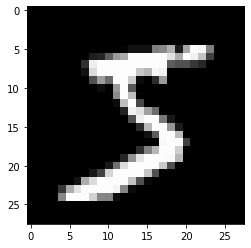

In [3]:
# Shows training image example

plt.imshow(x_train[0], cmap='gray')
plt.show()

In [4]:
# Scale the data

x_max = x_train.max()

x_train = x_train / x_max
x_test = x_test / x_max

In [5]:
# Builds the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=x_train[0].shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(labels), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Trains the model

model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2556 - accuracy: 0.9276
Epoch 2/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1118 - accuracy: 0.9669
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0753 - accuracy: 0.9770
Epoch 4/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.0566 - accuracy: 0.9821
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0435 - accuracy: 0.9860
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0341 - accuracy: 0.9894
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0266 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0223 - accuracy: 0.9930
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0185 - accuracy: 0.9945
Epoch 10/10


In [7]:
# Tests the model

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.0414 - accuracy: 0.9786

Test accuracy: 0.9786


In [8]:
# Retrieves all predictions

def get_predictions(images):
    return [np.argmax(a) for a in model.predict(images)]


predictions = get_predictions(x_test)

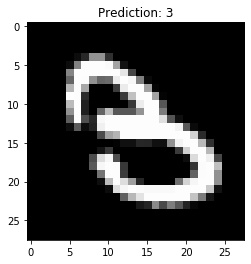

In [9]:
# Shows prediction on example image

n = 18

plt.imshow(x_test[n], cmap='gray')
plt.title('Prediction: %d' % predictions[n])
plt.show()

In [10]:
# Retrieves images model predicted wrong

fail_y = np.int8(predictions)

fail_x = x_test[y_test != predictions]
fail_y = fail_y[y_test != predictions]
real_y = y_test[y_test != predictions]

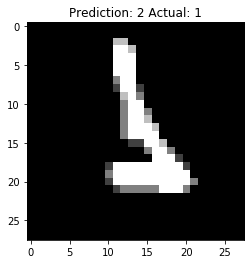

In [11]:
# Shows prediction and expected output on example image

n = 17

plt.imshow(fail_x[n], cmap='gray')
plt.title('Prediction: %d Actual: %d' % (fail_y[n], real_y[n]))
plt.show()